# Feature Selection Using Stochastic Gates

The method provides a deep neural network that performs feature selection for regression or classifcation tasks.

This tutorial demonstrates the method on an artificial classification task.
The paper appears in: https://arxiv.org/abs/1810.04247


# Installation

In [1]:
#!pip install --user stg

# Importing the model

In [1]:
from model import Model
from data_helper import get_reg_data, create_twomoon_dataset
import json
from sklearn.model_selection import train_test_split
from utils import DataSet, convertToOneHot, get_date_time
import matplotlib.pyplot as plt

# Loading parameters

In [2]:
with open('./params/params_twomoon.json', 'r') as f:
    params = json.load(f)
print(params)

{'hidden_layers_node': [60, 20, 2], 'output_node': 2, 'param_search': False, 'learning_rate': 0.01, 'feature_selection': True, 'sigma': 0.5, 'lam': 0.02, 'display_step': 1000, 'activation': 'tanh'}


# Creating the data set

In [3]:
n_size = 1000 #Number of samples
p_size = 20   #Number of features
X_data, y_data = create_twomoon_dataset(n_size, p_size)  #Two moons with nuisence parameters

(1000,)
(1000, 20)


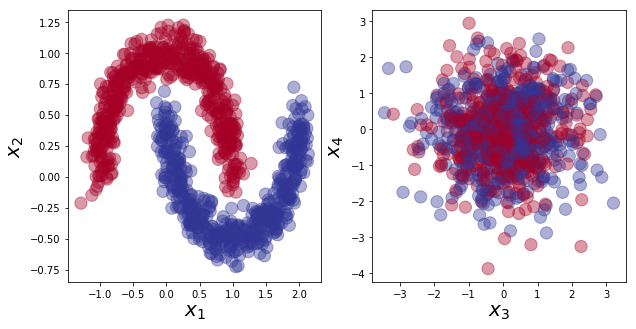

In [4]:
f,ax = plt.subplots(1,2,figsize=(10,5))
        

ax[0].scatter(x=X_data[:,0], y=X_data[:,1], s=150, c=y_data,alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[0].set_xlabel('$x_1$',fontsize=20)
ax[0].set_ylabel('$x_2$',fontsize=20)
ax[1].scatter(x=X_data[:,2], y=X_data[:,3], s=150, c=y_data,alpha=0.4,cmap=plt.cm.get_cmap('RdYlBu'),)
ax[1].set_xlabel('$x_3$',fontsize=20)
ax[1].set_ylabel('$x_4$',fontsize=20)
plt.tick_params(labelsize=10)

# Split data to train, test and validation

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, train_size=0.3)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train, train_size=0.8)


# Labels should be represented as one hot vectors

In [6]:
y_train=convertToOneHot(y_train.astype(int))
y_valid=convertToOneHot(y_valid.astype(int))
y_test=convertToOneHot(y_test.astype(int))

# Adjust parameters

In [7]:
params['lam'] = 0.5
params['learning_rate'] = 0.1
params['input_node'] = X_train.shape[1]
params['batch_size'] = X_train.shape[0]

# Define dataset and loss lists

In [8]:
dataset = DataSet(**{'_data':X_train, '_labels':y_train,
                '_valid_data':X_valid, '_valid_labels':y_valid,
                '_test_data':X_test, '_test_labels':y_test})
train_acc_mat, train_loss_mat = [], []
test_acc_list, test_loss_list = [], []

# Define the model and model_dir

In [ ]:
model_dir='tmp'
num_epoch=5000
model = Model(**params)

# Train the model

In [ ]:
train_acces, train_losses, val_acces, val_losses = model.train(params['param_search'], dataset, model_dir, num_epoch=num_epoch)

# Print the stochastic gates parameters

In [12]:
model.get_prob_alpha()

array([1., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0.], dtype=float32)

# Testing the model

In [13]:
y_pred=model.test(X_test)